In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


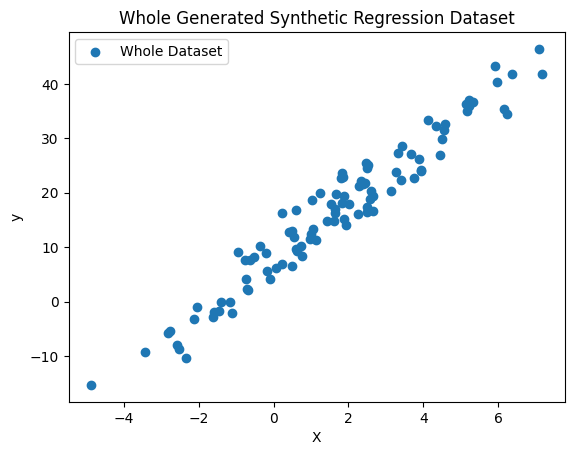

Training set shape: X_train: (70,), y_train: (70,)
Test set shape: X_test: (30,), y_test: (30,)


In [131]:
np.random.seed(0)

N = 100

m = 5
b = 8

X = X = 2.5 * np.random.randn(N) + 1.5

y = b + m * X + np.random.normal(0, 3.0, N)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


plt.scatter(X, y, label='Whole Dataset')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Whole Generated Synthetic Regression Dataset')
plt.show()

# Print the training and test set shapes
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


In [132]:
def gradient_descent(X_train, y_train, X_test, y_test, learning_rate=0.01, epochs=1000, verbose=True):
    w = 0
    b = 0
    N = len(X_train)
    
    for epoch in range(epochs):
        yhat = w * X_train + b
        error = yhat - y_train  
        d_dw = (2/N) * np.dot(X_train.T, error)
        d_db = (2/N) * np.sum(error)
        w = w - d_dw * learning_rate
        b = b - d_db * learning_rate
        
                
        if verbose and epoch % 100 == 0:
            cost = np.mean(error ** 2)
            print(f"Epoch {epoch}, Cost: {cost}")
    
    return w, b
    

In [133]:
myM, myB = gradient_descent(X_train, y_train, X_test, y_test, learning_rate=0.01, epochs=1000)

# print the size of myM and myB
print(f"myM: {myM}, myB: {myB}")


y_pred = myM * X_test + myB


Epoch 0, Cost: 485.100292882258
Epoch 100, Cost: 11.775309156665847
Epoch 200, Cost: 9.33670093334196
Epoch 300, Cost: 9.138017617879301
Epoch 400, Cost: 9.121830081289497
Epoch 500, Cost: 9.120511216943815
Epoch 600, Cost: 9.12040376370949
Epoch 700, Cost: 9.120395009058106
Epoch 800, Cost: 9.120394295781107
Epoch 900, Cost: 9.120394237667533
myM: 4.990194610622146, myB: 8.378020230028861


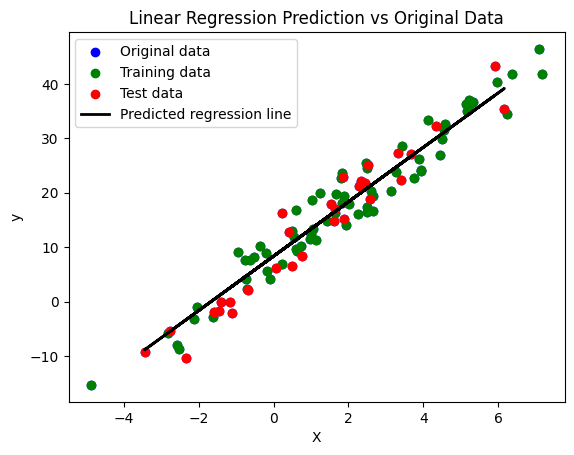

In [134]:
plt.scatter(X, y, color='blue', label='Original data')

# Plotting the training data
plt.scatter(X_train, y_train, color='green', label='Training data')

# Plotting the test data
plt.scatter(X_test, y_test, color='red', label='Test data')

# Plotting the predicted y values against X_test
plt.plot(X_test, y_pred, color='black', linewidth=2, label='Predicted regression line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Prediction vs Original Data')
plt.legend()
plt.show()

In [135]:
#use sklearn to compare
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Sklearn's model coefficients: {model.coef_}, {model.intercept_}")
print(f"My model's coefficients: {myM}, {myB}")

Sklearn's model coefficients: [4.9901895], 8.37804568728838
My model's coefficients: 4.990194610622146, 8.378020230028861
